# Lecture 1

~~- Part 1: Qiskit Basic (10min)~~
    - ~~Basic Quantum Gates and Operations~~
    - ~~Exercise: Quantum State manipulating with the gates - Bell State~~
~~- Part 2: Tutorial with GHZ Circuit (30 min)
    - Compose 3-qubits GHZ quantum circuits
    - simulating them on various backends, and visualizing the results~~
- Part 3: Introduction of the Quantum Information Theory (30min)
    - Phase Kickback
    - the Deutsch Jozsa algorithm
- Exercise (20min):
    - explore easy physics model by using qiskit with assignment1

# Part 3: Introduction of the Quantum Information Theory (30min)


## Phase kickback - How we use the global phase

A global phase plays nothing when it multiplied to a state, it plays nothing physical with the measurement.

$|\psi\rangle \rightarrow e^{i\alpha}|\psi\rangle $ then in measurement, $|\langle\phi|\psi\rangle|^2 \rightarrow |e^{i\alpha}\langle\phi|\psi\rangle|^2 = |e^{i\alpha}|^2|\langle\phi|\psi\rangle|^2 = |\langle\phi|\psi\rangle|^2$

But let's see what happens if we define a controlled operation with this:
let $V_\alpha = e^{i\alpha}I$ is a simple operation which multiply global phase to any state. If we define a controlled operation with $V_\alpha$, the result would be interesting like below:
$$|0\rangle\langle0|\otimes I + |1\rangle\langle1|\otimes e^{i\alpha}I = 
\begin{pmatrix}
1 & 0\\
0 & e^{i\alpha}
\end{pmatrix} \otimes I
$$
the phase is accumulated onto the control qubit - not the target qubit happens. This is the fundamentals of the "Phase Kickback". If we apply controlled-U operation onto the $|\psi_k\rangle$, one the of **eigenstate** of the U, then the $|\psi_k\rangle$ is unchanged but the $|0\rangle\langle0|\otimes I + |1\rangle\langle1|\otimes e^{i\alpha}I$ is applied to the control qubit and it can be measured.

The goal of this exercise is to examine a simple example of phase kickback. Complete the following task:
1. Generate two eigenstate of X Gate $|+\rangle$ and $|-\rangle$ 
Visualize it and make sure it is correct.
2. Execute it on the state vector simulator and visualize the result using `plot_bloch_multivector`.
3. Add a controlled-X gate (CNOT gate) to the circuit and draw the resulting circuit to make sure it is correct.
4. Execute it again the state vector simulator and visualize the result using `plot_bloch_multivector`. 

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity

import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to render plots
%matplotlib inline

backend = Aer.get_backend('statevector_simulator')

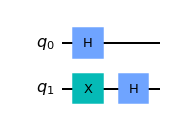

In [2]:
# Generate a quantum circuit for two qubits 
qc = QuantumCircuit(2)
# let's make a circuit that q0 -> +, q1 -> -

qc.x(1)
qc.h(range(2))

# Draw the quantum circuit
qc.draw(output='mpl')

In [3]:
# Run it on the state vector simulator
backend = Aer.get_backend('statevector_simulator')

job = execute(qc, backend)
result = job.result()
vec = result.get_statevector()

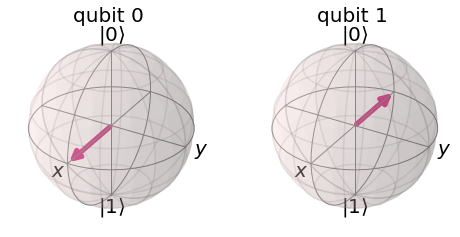

In [4]:
# Visualize the resulting state vector
plot_bloch_multivector(vec)

Since we only applied single qubit gates, our state is necessarily a product state. The $x$ axis on the Bloch sphere correspond to the states $|+\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$ (positive direction) and $|-\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. From the plot we can see that we got the state 
$$|-+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$$

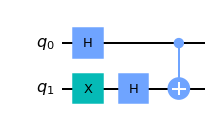

In [5]:
# Add a CNOT gate to the circuit

qc.cx(0,1)
# Draw the circuit
qc.draw(output='mpl')

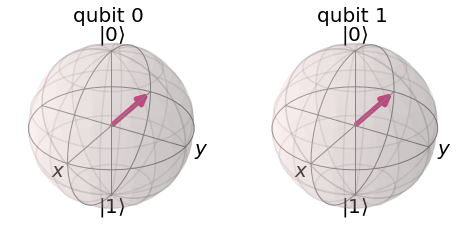

In [6]:
# Run it on the state vector simulator
job = execute(qc, backend)
result = job.result()
vec = result.get_statevector()
plot_bloch_multivector(vec)

From this plot we see that only the state of the qubit0 is changed. Although qubit 0 is just for the control and qubit 1 is the target, the CNOT gate nevertheless changes the state of qubit 0. The reason for that can be understood by going through the circuit step by step. 

The initial state before applying the CNOT gate is given by
1. The first $X$ gate creates the state
$$|00\rangle \xrightarrow{X} |10\rangle.$$
2. The subsequent Hadamard gates create the state
$$|10\rangle \xrightarrow {H\otimes H} |-+\rangle = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$
where $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$ is the eigenstates of $X$ with eigenvalues $-1$ and $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$ is the eigenstates with $1$.

If we now apply the CNOT (controlled $X$) gate, it acts on the second qubit if the control is qubit is $|1\rangle$. Thus, we obtain
$$CNOT|-+\rangle = \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)  = |--\rangle$$
Hence, we see that the target qubit is still in state $|-\rangle$ while the control qubit is in $|-\rangle$.

## Additional Exercise

Replace the CNOT gate with a controlled $R_x$ gate (`crx(angle, ind_control, ind_target)`). Repeat the experiment for several angles between $[0,2\pi]$. Guess what will we observe.

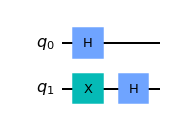

In [7]:
# Generate a quantum circuit for two qubits which generates |psi_0>
qc2 = QuantumCircuit(2)
# Add the gates
qc2.x(1)
qc2.h(0)
qc2.h(1)
# Draw the quantum circuit
qc2.draw(output='mpl')

In [8]:
# Number of steps
nsteps = 10
for i in range(nsteps):
    # We add a controlled R_x gate with different angle to our base circuit
    qc3 = QuantumCircuit(2)    
    qc3.compose(qc2, inplace=True)
    qc3.crx(i*4*np.pi/nsteps,0,1)
    # Run the resulting circuit on the state vector simulator
    job = execute(qc3, backend)
    result = job.result()
    vec = result.get_statevector()
    # Visualize the state vector
    h = plot_bloch_multivector(vec)    
    # Save the image to disk
    h.savefig(str(i)+'.png')    

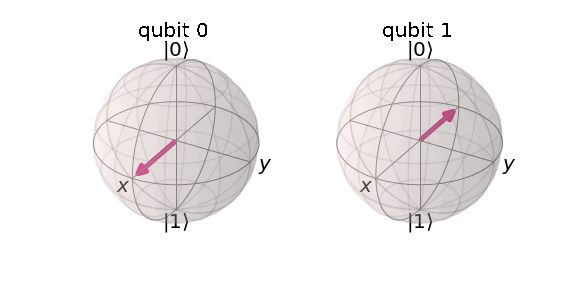

In [9]:
from IPython.display import Image
Image("gif.gif")

Till here, we've took a look at the basic but powerful ingredient to make a quantum algorithem. Belows are the link for the other famouse quantum methods which use the phase-kickback. 

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html

https://qiskit.org/textbook/ch-algorithms/grover.html

It's time for us using it to build a so famouse quantum algorithm - the Deutsch Jozsa with this principle.

## the Deutsch Jozsa algorithm


The Deutsch-Jozsa algorithm, first introduced in their famouse paper-[Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558, 1992](doi:10.1098/rspa.1992.0167)., was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

In here, we will simply cover the foundamentals.

We are given a hidden Boolean function (usually called by "Oracle") $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns the same result regardless of the inputs - all  0 's or all  1 's, while a balanced function returns  0 's for exactly half of all inputs and  1 's for the other half. Our task is to determine whether the given function is balanced or constant.

With a classical approach, if we have N inputs, we need to put maximum  𝑁/2+1  inputs to test the function. Of course, if we are lucky enough, we can just get the answers with only 2 inputs.

But the Deutsch Jozsa algorithm guarantee that we can get the answer with only one shot. Let's see how it work.

### Quantum parallelism

With a superposition state of a quantum computer, we can achieve the "Quantum parallelism".

If we have a $|+\rangle =\frac{1}{\sqrt{2}}\left(|0\rangle + |1 \rangle \right)$ state and then apply any quantum operation $U$ to it, we can get the $|\psi\rangle =\frac{1}{\sqrt{2}}\left(U|0\rangle + U|1 \rangle \right)$. This result contains both of the result - $U|0\rangle$ and $U|1\rangle$, and this is the foundation of the quantum parallelism and this is one of the foundations of the Deutsch-Jozsa algorithm's quantum excellency.

In a classical way, we need to set up registers to encode binary information in every computational iteration, but in quantum computers, we can encode the whole possible binary input value with one circuit.

For example, in a classical way, we need to prepare two circuits to encode 0 and 1 like below:

In [9]:
qc = QuantumCircuit(1)

#encode 0 to the register
##do nothing because of the quantum registers automatically initialized into 0

job = execute(qc, backend)
result = job.result()
print(result.get_counts())

{'0': 1.0}


In [10]:
qc = QuantumCircuit(1)
#encode 1 to the register
qc.x(0)
job = execute(qc, backend)
result = job.result()
print(result.get_counts())

{'1': 1.0}


But with quantum parallelism, we can encode both of the information simply by applying the Hadamard gate onto one qubit.

In [11]:
qc = QuantumCircuit(1)
#encode 1 to the register
qc.h(0)
job = execute(qc, backend)
result = job.result()
print(result.get_counts())

{'0': 0.5, '1': 0.5}


In this way, we can encode $2^N$ data only with the N qubits. For example, we can encode 16 data with 4 qubits with equally probable way like below:

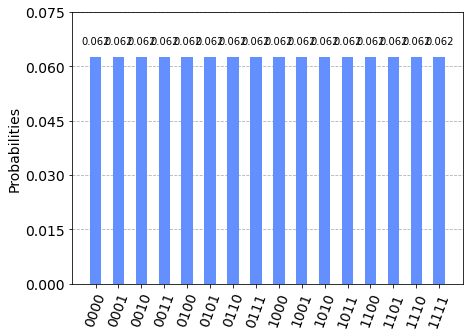

In [12]:
qc = QuantumCircuit(4)
#encode 1 to the register
qc.h(range(4))
job = execute(qc, backend)
result = job.result()
plot_histogram(result.get_counts())


In [13]:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

So the first step of the Deutsch-Jozsa algorithm is to prepare inputs for testing the oracle in this manner. The general step of the Deutsch-Jozsa algorithm is:

1. prepare superpositioned inputs
2. apply these inputs to the Oracle
3. Measure the inputs with a proper computational basis. if the oracle is constant, it will return 0000 or 1111 but if not, it will return 0% of probability on measuring 0000 or 1111.

The art of the Deutsch-Jozsa algorithm is this quantum parallelism and the rest of the part is understanding how to compose an Oracle to handle this parallelism and how to apply proper measurement with this quantum-excellency.

Remember that the inputs created in this way is in the $|+\rangle$ state and it is in the eigenstate of the x gate as we talked about earlier.
The oracle of this algorithm should be something that "acts" on these superpositioned data, and in this example we want to write our own constant/balanced oracle that operates on the these superposition state using phase-kickback. 


I've mentioned that it is important to apply "proper" measurement because it uses the "quantum principle" to work on. In this tutorial, we will build a phase-kickback-oriented oracle that operates on the X-axis, so here, we need to measure the input on an x basis. This is simply achieved by applying the Hadamard gate before measurement and you can check more details of this [here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#measuring).

So the general step of this algorithm revised like:
1. prepare superpositioned N qubit inputs
2. apply inputs to the Oracle
3. to measure the result after oracle, apply the H gate to all input qubits then measure it all to get a result to validate the oracle.
The total scheme of this flow will look like this:

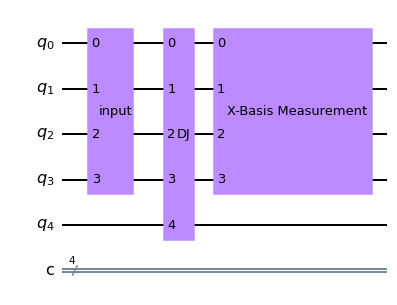

In [14]:
Image("DJ_Scheme.png")

Let's work with the input circuit first.

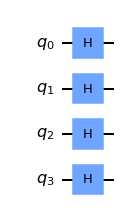

In [14]:
digit = 4
input = QuantumCircuit(digit)
input.h(range(4))
input.name = "input"
input.draw('mpl')

Next, prepare a void quantum circuit to compose the oracle with digit+1 qubits. the +1 comes from the auxiliary qubit for the phase kickback.

In [18]:
oracle = QuantumCircuit(digit+1) # gives one out of 5 oracles
oracle.name = "DJ"
oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4:

The final step is prepare a quantum circuit for the measurement.

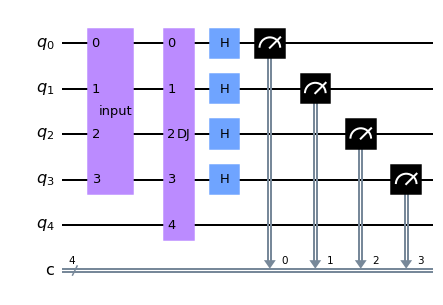

In [19]:
#combine all
dj = QuantumCircuit(digit + 1, digit) #will use 4digit binary data and we need one auxillary qubit
#prepare inputs with quantum parallelism
dj.append(input, range(digit))
#apply oracle
dj.append(oracle, range(digit+1))
#apply x basis measurement
dj.h(range(digit))
dj.measure(range(digit), range(digit))

dj.draw('mpl')


with this void Oracle function, the measurement result is this

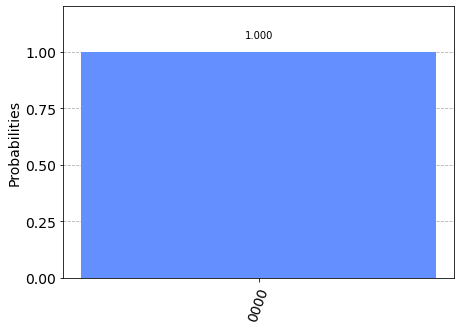

In [20]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(dj, qasm_simulator, shots=1024)
result = job.result()
answer = result.get_counts()

plot_histogram(answer)

We've made a "Constant Oracle" which returns "0000" whatever the input is. Let's imply building a Constant oracle that returns "1111" with every input. What is your strategy with this? below is my simple strategy. Hope you try to build your own one.

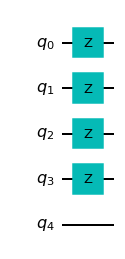

In [21]:
#Constant oracle with returns 1111
oracle = QuantumCircuit(digit+1) # gives one out of 5 oracles
oracle.name = "DJ"
oracle.z(range(digit))
oracle.draw('mpl')

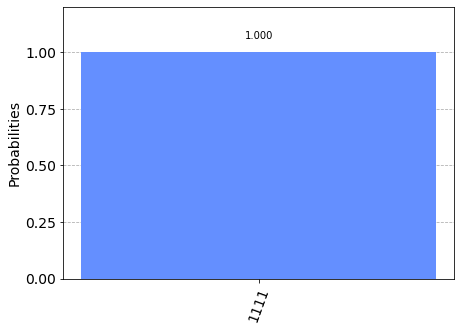

In [22]:
#combine all
dj = QuantumCircuit(digit + 1, digit) #will use 4digit binary data and we need one auxillary qubit
#prepare inputs with quantum parallelism
dj.append(input, range(digit))
#apply oracle
dj.append(oracle, range(digit+1))
#apply x basis measurement
dj.h(range(digit))
dj.measure(range(digit), range(digit))

qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(dj, qasm_simulator, shots=1024)
result = job.result()
answer = result.get_counts()

plot_histogram(answer)

### Build balanced oracle with the "phase-kickback" principle

Now, try to build a balanced oracle with the phase kickback. There are so many ways to compose it and we can simply add one control gate to make it this way.

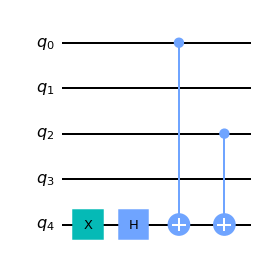

In [24]:
oracle = QuantumCircuit(digit+1) # gives one out of 5 oracles
oracle.name = "DJ"

#to work with the phase kickback, first, set the auxilary qubit into the |-> state
oracle.x(4)
oracle.h(4)

#then apply cx operation some of the input qubit with the auxilary
oracle.cx(0, 4)
oracle.cx(2, 4)

oracle.draw('mpl')

And let's check the result!

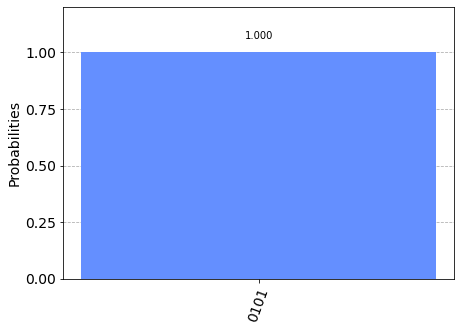

In [25]:
dj = QuantumCircuit(digit + 1, digit) #will use 4digit binary data and we need one auxillary qubit

#prepare inputs with quantum parallelism
dj.append(input, range(digit))
#apply oracle
dj.append(oracle, range(digit+1))
#apply x basis measurement
dj.h(range(digit))
dj.measure(range(digit), range(digit))

qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(dj, qasm_simulator, shots=1024)
result = job.result()
answer = result.get_counts()

plot_histogram(answer)

In [26]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

q5devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
backend = least_busy(q5devices)
backend

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
job_exp = execute(dj, backend=backend, shots=10) #<< super small number
job_monitor(job_exp)

Job Status: job is queued (3)     

KeyboardInterrupt: 

In [28]:
job_id = '61717b8d7c5dd5553ffd32fa'

print('JOB ID: {}'.format(job_id))

JOB ID: 61717b8d7c5dd5553ffd32fa


In [29]:
result_exp = backend.retrieve_job(job_id).result()
#result_exp = job_exp.result()
counts_exp = result_exp.get_counts(dj)
plot_histogram(counts_exp)

IBMQBackendError: 'Failed to get job 61717b8d7c5dd5553ffd32fa: job does not belong to backend ibmq_belem.'

To see the noisy feature of the backend, let's run this experiment with more shots.

In [34]:
job_exp = execute(dj, backend=backend, shots=8192) #8192 is the maximum shot number for the current real backend.
job_monitor(job_exp)

Job Status: job has successfully run


In [36]:
job_id = '61717bdf1cc68123c098724c'

print('JOB ID: {}'.format(job_id))

JOB ID: 61717bdf1cc68123c098724c


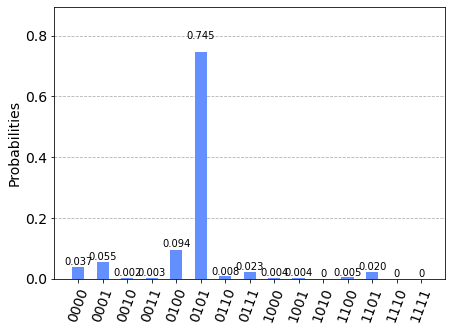

In [37]:
result_exp = backend.retrieve_job(job_id).result()
#result_exp = job_exp.result()
counts_exp = result_exp.get_counts(dj)
plot_histogram(counts_exp)

For further study, please take a look at:
### Qiskit textbook 

[here](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html )

### Qiskit Youtube Lecture: 

[Writing and Running Quantum Programs - Part 1]( https://www.youtube.com/watch?v=qrYVO9-dxLE)

[Writing and Running Quantum Programs - Part 2](https://www.youtube.com/watch?v=iJX794qJIpY&list=RDCMUClBNq7mCMf5xm8baE_VMl3A&index=4)

[Writing and Running Quantum Programs - Part 3](https://www.youtube.com/watch?v=enYP9TaDeJI&list=RDCMUClBNq7mCMf5xm8baE_VMl3A&start_radio=1&rv=enYP9TaDeJI&t=0)


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright